# Chapter 3 - Exercises

## Set Up

### Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

### Defaults

In [2]:
# seaborn defaults
sns.set(
    style="whitegrid",
    font_scale=1.2,
    rc={
        "axes.edgecolor": "0",
        "axes.grid.which": "both",
        "axes.labelcolor": "0",
        "axes.spines.right": False,
        "axes.spines.top": False,
        "xtick.bottom": True,
        "ytick.left": True,
    },
)

colors = sns.color_palette()

## Easy

In [70]:
posterior, p_grid = calculate_posterior_from_globe_tossing(6, 9)

# sample from the posterior
np.random.seed(100)
samples = np.random.choice(p_grid, size=10000, p=posterior, replace=True)

Plot posterior for sense checks

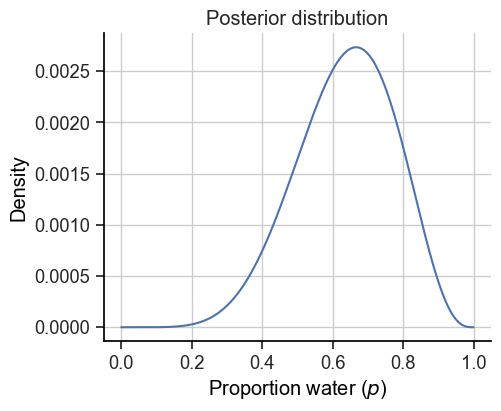

In [72]:
fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(p_grid, posterior)
ax.set(
    title="Posterior distribution",
    xlabel="Proportion water ($p$)",
    ylabel="Density",
);

### 3E1

How much posterior probability lies below $p=0.2$?

---

In [45]:
(samples < 0.2).mean()

0.001

### 3E2

How much posterior probability lies above $p = 0.8$?

---

In [37]:
(samples > 0.8).mean().round(3)

0.1209

### 3E3

How much posterior probability lies between $p = 0.2$ and $p = 0.8$?

---

From the above it's 0.878, but to calculate it explicitly:

In [43]:
((samples > 0.2) & (samples < 0.8)).mean().round(3)

0.878

### 3E4

20% of the posterior probability lies below which value of $p$?

---

In [42]:
np.percentile(samples, 20).round(3)

0.516

### 3E5

20% of the posterior probability lies above which value of $p$?

---

In [46]:
np.percentile(samples, 80).round(3)

0.76

### 3E6

Which values of $p$ contain the narrowest interval equal to 66% of the posterior probability?

---

I don't have their HPDI package, but I can quickly find an approximate solution

In [75]:
def calculate_hpdi(samples, prob):
    "Get highest posterior density interval from samples"
    perc_lower = np.linspace(0, 100 * (1 - prob), 1000)
    perc_upper = perc_lower + 100 * prob

    perc = np.c_[perc_lower, perc_upper]

    interval = np.percentile(samples, perc)
    interval_width = interval[:, 1] - interval[:, 0]

    idx_best = np.argmin(interval_width)
    interval_best = interval[idx_best]
    perc_best = perc[idx_best]

    return interval_best, perc_best

In [77]:
interval, perc = calculate_hpdi(samples, prob=0.66)

print("Narrowest interval: ", interval.round(3))
print("Percentiles: ", perc.round(3))

Narrowest interval:  [0.517 0.789]
Percentiles:  [20.08 86.08]


### 3E7

Which values of $p$ contain 66% of the posterior probability, assuming equal posterior probability both below and above the interval?

---

I think this wants the central 66% interval.

In [69]:
lower = (100 - 66) / 2
upper = (100 + 66) / 2
print("Interval: ", np.percentile(samples, [lower, upper]).round(3))

Interval:  [0.498 0.773]


## Medium

### 3M1

Suppose the globe tossing data had turned out to be 8 water in 15 tosses. Construct the posterior distribution, using grid approximation. Use the same flat prior as before.

---

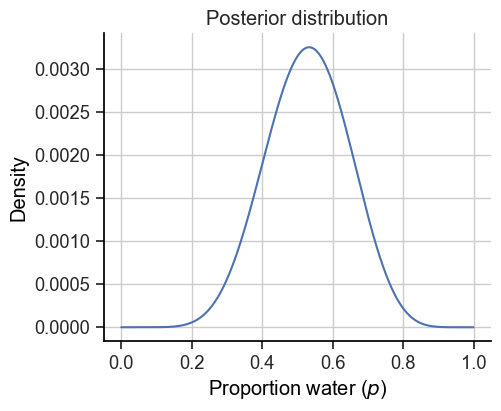

In [135]:
posterior, p_grid = calculate_posterior_from_globe_tossing(8, 15)

# plot the posterior
fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(p_grid, posterior)
ax.set(
    title="Posterior distribution",
    xlabel="Proportion water ($p$)",
    ylabel="Density",
);

### 3M2

Draw 10,000 samples from the grid approximation from above. Then use the sample to calculate the 90% HPDI for $p$.

---

In [101]:
samples = np.random.choice(p_grid, size=10000, p=posterior, replace=True)

interval, perc = calculate_hpdi(samples, prob=0.9)

print("HPDI: ", interval.round(3))
print("Percentiles: ", perc.round(3))

HPDI:  [0.332 0.717]
Percentiles:  [ 4.775 94.775]


### 3M3

Construct a posterior predictive check for this model and data. This means simulate the distribution of samples, averaging over the posterior uncertainty in $p$. What is the probability of observing 8 water in 15 tosses?

---

We sample from a binomial distribution using the posterior samples for the probabilities. 

In [106]:
n_samples = len(samples)
posterior_predictive_samples = stats.binom.rvs(n=15, p=samples, size=n_samples)

print("Probability of 8 water: ", (posterior_predictive_samples == 8).mean().round(3))

Probability of 8 water:  0.143


### 3M4 

Using the posterior distribution constructed from the new (8/15) data, now calculate the probability of observing 6 water in 9 tosses.

---

We use the same posterior samples but change the parameters of the Binomial distribution we are sampling

In [105]:
posterior_predictive_samples = stats.binom.rvs(n=9, p=samples, size=n_samples)

print(
    "Probability of 6 water from 9 tosses: ",
    (posterior_predictive_samples == 6).mean().round(3),
)

Probability of 6 water from 9 tosses:  0.172


### 3M5

Start over at 3M1, but now use a prior that is zero below $p = 0.5$ and a constant above $p = 0.5$. This corresponds to prior information that a majority of the Earth’s surface is water. Repeat each problem above and compare the inferences (using both priors) to the true value $p = 0.7$.

---

First calculate and plot the posterior from 8 waters out of 15 tosses.

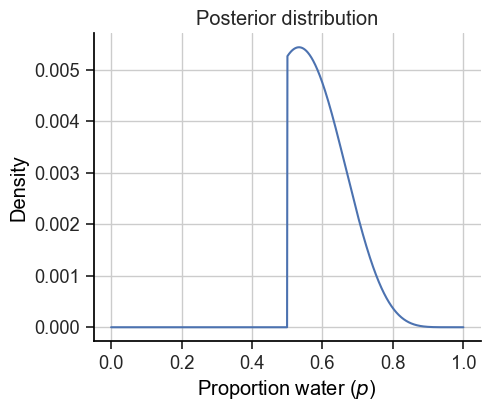

In [137]:
prior_rv = stats.uniform(0.5, 0.5)
posterior, p_grid = calculate_posterior_from_globe_tossing(8, 15, prior_rv)

# plot the posterior
fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(p_grid, posterior)
ax.set(
    title="Posterior distribution",
    xlabel="Proportion water ($p$)",
    ylabel="Density",
);

Now get the HPDI - obviously from the plot above this will just be the interval starting at 0.5.

In [122]:
samples = np.random.choice(p_grid, size=10000, p=posterior, replace=True)

interval, perc = calculate_hpdi(samples, prob=0.9)

print("HPDI: ", interval.round(3))
print("Percentiles: ", perc.round(3))

HPDI:  [0.501 0.709]
Percentiles:  [ 0. 90.]


Now the posterior predictive sample

In [125]:
n_samples = len(samples)
posterior_predictive_samples = stats.binom.rvs(n=15, p=samples, size=n_samples)

print(
    "Probability of 8 water from 15 tosses: ",
    (posterior_predictive_samples == 8).mean().round(3),
)

Probability of 8 water from 15 tosses:  0.154


In [126]:
posterior_predictive_samples = stats.binom.rvs(n=9, p=samples, size=n_samples)

print(
    "Probability of 6 water from 9 tosses: ",
    (posterior_predictive_samples == 6).mean().round(3),
)

Probability of 6 water from 9 tosses:  0.229


The true value is 0.7, so the true probabilities are:

In [129]:
p = 0.7
print(
    "Probability of 8 water from 15 tosses: ", stats.binom.pmf(n=15, k=8, p=p).round(3)
)
print("Probability of 6 water from 9 tosses: ", stats.binom.pmf(n=9, k=6, p=p).round(3))

Probability of 8 water from 15 tosses:  0.081
Probability of 6 water from 9 tosses:  0.267


The second prior does a better job at modelling the true value because it allows us to disregard the possibility that $p < 0.5$, which would otherwise be reasonably likely given the observed data. 

### 3M6

Suppose you want to estimate the Earth’s proportion of water very precisely. Specifically, you want the 99% percentile interval of the posterior distribution of $p$ to be only 0.05 wide. This means the distance between the upper and lower bound of the interval should be 0.05. How many times will you have to toss the globe to do this?

---

We simulate taking observations one at a time, updating the posterior, and finding the width of the central 99% density interval. To understand the variation we simulate doing this 1000 times simultaneously.

In [353]:
def calculate_interval_width_by_number_of_observations(
    n_sim, max_obs, p=0.7, density=99, prior_rv=None, n_grid=1000
):
    if not prior_rv:
        prior_rv = stats.uniform()

    p_grid = np.linspace(0, 1, n_grid)
    prior = prior_rv.pdf(p_grid)

    # we broadcast these for the multiple simulations
    p_grids = np.array([p_grid] * n_sim)
    posteriors = np.array([prior] * n_sim)

    widths = np.empty((max_obs, n_sim))
    for obs_num in range(max_obs):
        obs = stats.bernoulli.rvs(p=p, size=n_sim)
        obs_broadcast = np.array([obs] * n_grid).T

        likelihoods = stats.bernoulli.pmf(obs_broadcast, p_grids)

        # update
        posteriors = likelihoods * posteriors
        posteriors = posteriors / posteriors.sum(axis=1, keepdims=True)

        # get width of 99% density interval
        posterior_cdfs = np.cumsum(posteriors, axis=1)

        perc_lower = (1 - density / 100) / 2
        lower_idx = np.argmin(np.abs(posterior_cdfs - perc_lower), axis=1)
        lower = p_grid[lower_idx]

        perc_upper = (1 + density / 100) / 2
        upper_idx = np.argmin(np.abs(posterior_cdfs - perc_upper), axis=1)
        upper = p_grid[upper_idx]

        widths[obs_num, :] = upper - lower

    return widths

In [357]:
uniform_widths = calculate_interval_width_by_number_of_observations(
    n_sim=1000, max_obs=5000
)

step_prior = stats.uniform(0.5, 0.5)
step_widths = calculate_interval_width_by_number_of_observations(
    n_sim=1000, max_obs=5000, prior_rv=step_prior
)

Plot the mean interval width against number of observations with 90% density region.

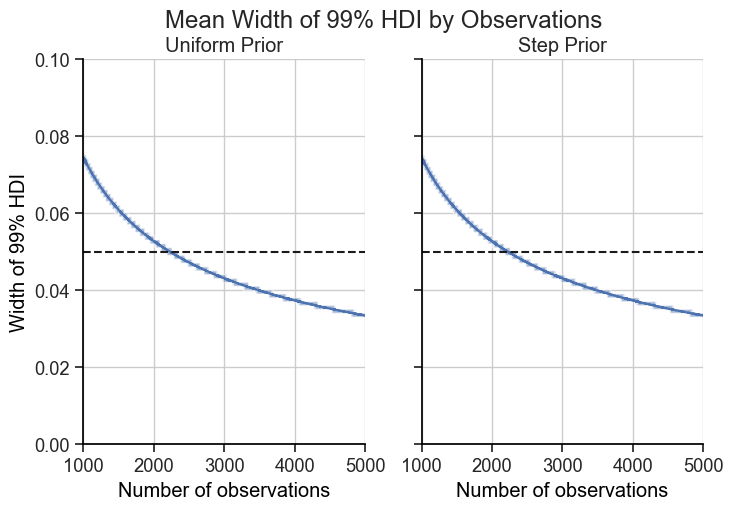

In [371]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 5), sharey=True)

for widths, ax in zip((uniform_widths, step_widths), (ax1, ax2)):
    ax.plot(widths.mean(axis=1), label="mean interval width")
    ax.fill_between(
        x=range(widths.shape[0]),
        y2=np.percentile(uniform_widths, 5, axis=1),
        y1=np.percentile(uniform_widths, 95, axis=1),
        alpha=0.5,
        label="90% density",
    )
    ax.axhline(0.05, ls="--", color="k", label="target width")

    ax.set(
        xlim=[1000, 5000],
        ylim=[0, 0.1],
        xlabel="Number of observations",
    )

ax1.set(ylabel="Width of 99% HDI", title="Uniform Prior")
ax2.set(title="Step Prior")

fig.suptitle("Mean Width of 99% HDI by Observations");

You can see that there is not difference between the 2 priors at this points.

Let's find the point at which the interval becomes narrower than 0.05. We actually just find the point where it is closest to 0.05 - this is off by at most 1.

In [383]:
n_obs_for_width_below_threshold_uniform = np.argmin(
    np.abs(uniform_widths - 0.05), axis=0
)
n_obs_for_width_below_threshold_step = np.argmin(np.abs(step_widths - 0.05), axis=0)

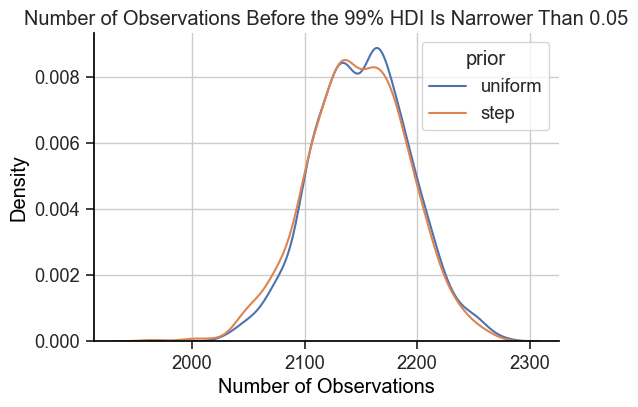

In [388]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.kdeplot(n_obs_for_width_below_threshold_uniform, label="uniform", ax=ax)
sns.kdeplot(n_obs_for_width_below_threshold_step, label="step", ax=ax)

ax.set(
    xlabel="Number of Observations",
    title="Number of Observations Before the 99% HDI Is Narrower Than 0.05",
)
ax.legend(title="Prior");

In [392]:
print(
    f"Mean number of observations: {n_obs_for_width_below_threshold_step.mean():.0f}±{n_obs_for_width_below_threshold_step.std():.0f}"
)

Mean number of observations: 2147±44


## Hard

In [396]:
birth1 = np.array(
    [
        1,
        0,
        0,
        0,
        1,
        1,
        0,
        1,
        0,
        1,
        0,
        0,
        1,
        1,
        0,
        1,
        1,
        0,
        0,
        0,
        1,
        0,
        0,
        0,
        1,
        0,
        0,
        0,
        0,
        1,
        1,
        1,
        0,
        1,
        0,
        1,
        1,
        1,
        0,
        1,
        0,
        1,
        1,
        0,
        1,
        0,
        0,
        1,
        1,
        0,
        1,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        1,
        1,
        0,
        1,
        0,
        0,
        1,
        0,
        0,
        0,
        1,
        0,
        0,
        1,
        1,
        1,
        1,
        0,
        1,
        0,
        1,
        1,
        1,
        1,
        1,
        0,
        0,
        1,
        0,
        1,
        1,
        0,
        1,
        0,
        1,
        1,
        1,
        0,
        1,
        1,
        1,
        1,
    ]
)
birth2 = np.array(
    [
        0,
        1,
        0,
        1,
        0,
        1,
        1,
        1,
        0,
        0,
        1,
        1,
        1,
        1,
        1,
        0,
        0,
        1,
        1,
        1,
        0,
        0,
        1,
        1,
        1,
        0,
        1,
        1,
        1,
        0,
        1,
        1,
        1,
        0,
        1,
        0,
        0,
        1,
        1,
        1,
        1,
        0,
        0,
        1,
        0,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        0,
        1,
        1,
        0,
        1,
        1,
        0,
        1,
        1,
        1,
        0,
        0,
        0,
        0,
        0,
        0,
        1,
        0,
        0,
        0,
        1,
        1,
        0,
        0,
        1,
        0,
        0,
        1,
        1,
        0,
        0,
        0,
        1,
        1,
        1,
        0,
        0,
        0,
        0,
    ]
)

### 3H1

Using grid approximation, compute the posterior distribution for the probability of a birth being a boy. Assume a uniform prior probability. Which parameter value maximizes the posterior probability?

---

In [427]:
n_grid = 1000
prior_rv = stats.uniform()

n_births = birth1.shape[0] + birth2.shape[0]
n_boys = birth1.sum() + birth2.sum()

grid = np.linspace(0, 1, n_grid)
prior = prior_rv.pdf(grid)

likelihood = stats.binom.pmf(k=n_boys, n=n_births, p=grid)

posterior = likelihood * prior
posterior /= posterior.sum()

Plot the posterior

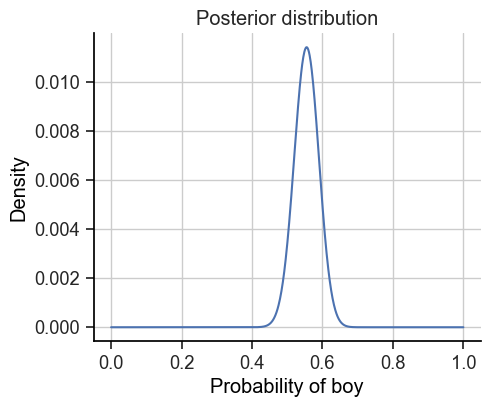

In [428]:
fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(grid, posterior)
ax.set(
    title="Posterior distribution",
    xlabel="Probability of boy",
    ylabel="Density",
);

In [429]:
print(
    "Maximum a posteriori probability of a boy: ", grid[np.argmax(posterior)].round(3)
)

Maximum a posteriori probability of a boy:  0.555


### 3H2

Using the sample function, draw 10,000 random parameter values from the posterior distribution you calculated above. Use these sample to estimate the 50%, 89%, and 97% highest posterior density intervals.

---

In [430]:
n_samples = 10000
samples = np.random.choice(grid, p=posterior, size=n_samples, replace=True)

for prob in [0.5, 0.89, 0.97]:
    interval, _ = calculate_hpdi(samples, prob)
    print(f"Probability: {prob}, Interval: ", interval.round(3))

Probability: 0.5, Interval:  [0.527 0.573]
Probability: 0.89, Interval:  [0.499 0.613]
Probability: 0.97, Interval:  [0.481 0.633]


### 3H3

Use `rbinom` to simulate 10,000 replicates of 200 births.
You should end up with 10,000 numbers, each one a count of boys out of 200 births.
Compare the distribution of predicted numbers of boys to the actual count in the data (111 boys out of 200 births).
There are many good ways to visualize the simulations, but the `dens` command (part of the rethinking package) is probably the easiest way in this case.
Does it look like the model fits the data well?
That is, does the distribution of predictions include the actual observation as a central, likely outcome?

---

In [431]:
pp_samples = stats.binom.rvs(n=200, p=samples, size=n_samples)

Plot simulations against observed value.

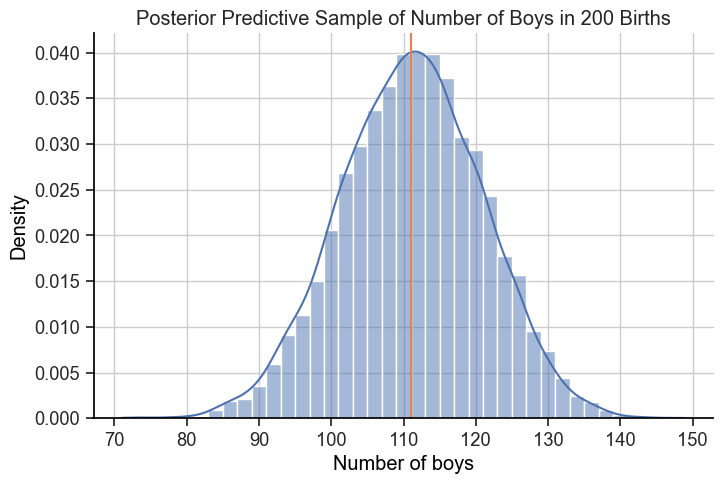

In [432]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(pp_samples, binwidth=2, kde=True, stat="density")
ax.axvline(n_boys, color=colors[1])

ax.set(
    xlabel="Number of boys",
    title="Posterior Predictive Sample of Number of Boys in 200 Births",
);

Looks good to me.

### 3H4

Now compare 10,000 counts of boys from 100 simulated first borns only to the number of boys in the first births, `birth1`. How does the model look in this light?

---

Compare the posterior predictive for 100 births to the first births data.

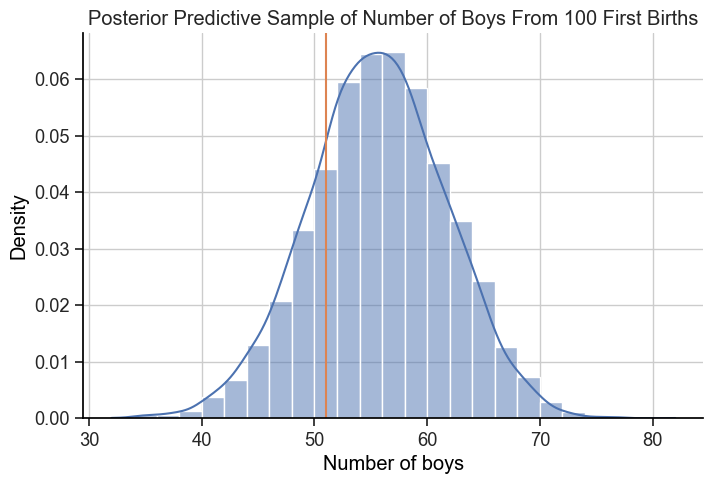

In [433]:
n_births1 = birth1.shape[0]
n_boys1 = birth1.sum()

# posterior predictive
pp_samples = stats.binom.rvs(n=n_births1, p=samples, size=n_samples)

# plot
fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(pp_samples, binwidth=2, kde=True, stat="density")
ax.axvline(n_boys1, color=colors[1])

ax.set(
    xlabel="Number of boys",
    title="Posterior Predictive Sample of Number of Boys From 100 First Births",
);

Now the model doesn't look good - it looks to be overestimating the number of boys.

### 3H5

The model assumes that sex of first and second births are independent.
To check this assumption, focus now on second births that followed female first borns.
Compare 10,000 simulated counts of boys to only those second births that followed girls.
To do this correctly, you need to count the number of first borns who were girls and simulate that many births, 10,000 times.
Compare the counts of boys in your simulations to the actual observed count of boys following girls.
How does the model look in this light?
Any guesses what is going on in these data?

---

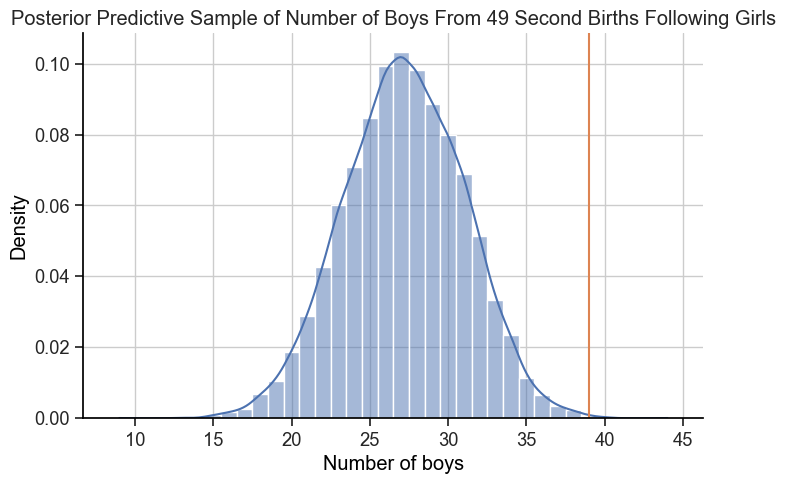

In [445]:
# restrict to second births where the first birth was female
girl_first_idx = np.where(birth1 == 0)[0]
girl_first_birth2 = birth2[girl_first_idx]

n_girl_first = girl_first_idx.shape[0]
n_girl_first_boy_second = girl_first_birth2.sum()

# posterior predictive
pp_samples = stats.binom.rvs(n=n_girl_first, p=samples, size=n_samples)

# plot
fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(pp_samples, discrete=True, kde=True, stat="density")
ax.axvline(n_girl_first_boy_second, color=colors[1])

ax.set(
    xlabel="Number of boys",
    title="Posterior Predictive Sample of Number of Boys From 49 Second Births Following Girls",
);

There are far more boys in the data than the model predicts.

It looks like if the first child is a girl, it is much more likely that the second child is a boy.
I doubt that this has a biological cause so it is probably a result of the sampling process.
Since the data comes from two-child families, it is possible that some parents that have two girls have more children in the hope of having a boy, so there is a selection effect: those families who had two girls in succession are less likely to have exactly two children.